# NYC Customer Service Requests Analysis

# DESCRIPTION | Background of Problem Statement

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

Problem Objective:

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

Analysis Tasks to be performed:

(Perform a service request data analysis of New York City 311 calls) 

1. Import a 311 NYC service request.
2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
5. Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

a) Whether the average response time across complaint types is similar or not (overall)

b) Are the type of complaint or service requested and location related?

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
# Importing a 311 NYC service request
NYCdata = pd.read_csv ('C:/Users/acer/Desktop/Data Warehousing/NYC Customer Service Requests Analysis/NYCdata.csv')

C:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
NYCdata.head

<bound method NDFrame.head of         Unique Key            Created Date             Closed Date Agency  \
0         32310363  12/31/2015 11:59:45 PM           01-01-16 0:55   NYPD   
1         32309934  12/31/2015 11:59:44 PM           01-01-16 1:26   NYPD   
2         32309159  12/31/2015 11:59:29 PM           01-01-16 4:51   NYPD   
3         32305098  12/31/2015 11:57:46 PM           01-01-16 7:43   NYPD   
4         32306529  12/31/2015 11:56:58 PM           01-01-16 3:24   NYPD   
...            ...                     ...                     ...    ...   
300693    30281872  03/29/2015 12:33:41 AM                     NaN   NYPD   
300694    30281230  03/29/2015 12:33:28 AM  03/29/2015 02:33:59 AM   NYPD   
300695    30283424  03/29/2015 12:33:03 AM  03/29/2015 03:40:20 AM   NYPD   
300696    30280004  03/29/2015 12:33:02 AM  03/29/2015 04:38:35 AM   NYPD   
300697    30281825  03/29/2015 12:33:01 AM  03/29/2015 04:41:50 AM   NYPD   

                            Agency Name      

In [4]:
NYCdata.shape

(300698, 53)

In [5]:
NYCdata.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
NYCdata['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [7]:
NYCdata['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [8]:
ComplaintType = pd.DataFrame({'count':
                                  NYCdata.groupby(['Complaint Type','City']).size()}).reset_index()
ComplaintType

,Complaint Type,City,count
0,Animal Abuse,ARVERNE,38
1,Animal Abuse,ASTORIA,125
2,Animal Abuse,BAYSIDE,37
3,Animal Abuse,BELLEROSE,7
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
759,Vending,STATEN ISLAND,25
760,Vending,SUNNYSIDE,15
761,Vending,WHITESTONE,1
762,Vending,WOODHAVEN,6


In [9]:
NYCdata.groupby(['Borough','Complaint Type','Descriptor']).size()


Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      132
                                    In Car                        36
                                    Neglected                    673
                                    No Shelter                    71
                                    Other (complaint details)    311
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 11
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 288, dtype: int64

# Converting the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ 

In [10]:
import datetime

In [11]:
NYC = pd.read_csv('C:/Users/acer/Desktop/Data Warehousing/NYC Customer Service Requests Analysis/NYCdata.csv', parse_dates=["Created Date", "Closed Date"])


C:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
NYC["Request_Closing_Time"] = NYC["Closed Date"] - NYC["Created Date"]


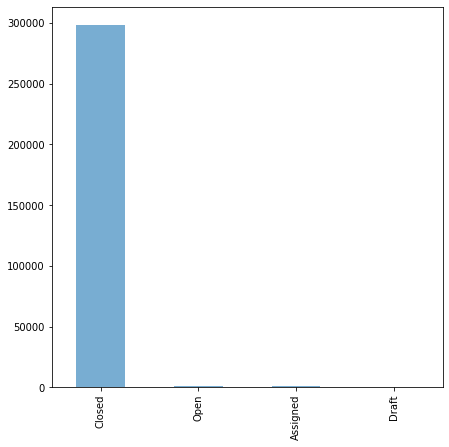

In [13]:
NYC['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

# Insights/patterns in a visual format (graphs or tables) of Major Complaint Types

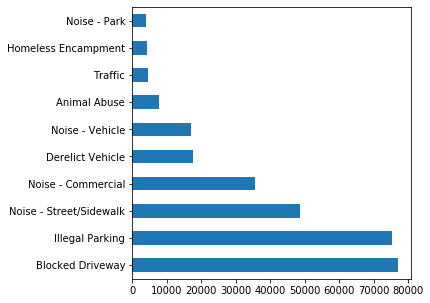

In [14]:
NYCdata['Complaint Type'].value_counts().head(10).plot(kind='barh',figsize=(5,5));

In [15]:
NYCdata.groupby(["Borough","Complaint Type","Descriptor"]).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      132
                                    In Car                        36
                                    Neglected                    673
                                    No Shelter                    71
                                    Other (complaint details)    311
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 11
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 288, dtype: int64

In [16]:
majorcomplaints=NYCdata.dropna(subset=["Complaint Type"])
majorcomplaints=NYCdata.groupby("Complaint Type")

sortedComplaintType = majorcomplaints.size().sort_values(ascending = False)
sortedComplaintType = sortedComplaintType.to_frame('Count').reset_index()

sortedComplaintType
sortedComplaintType.head(15)

,Complaint Type,Count
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718
5,Noise - Vehicle,17083
6,Animal Abuse,7778
7,Traffic,4498
8,Homeless Encampment,4416
9,Noise - Park,4042


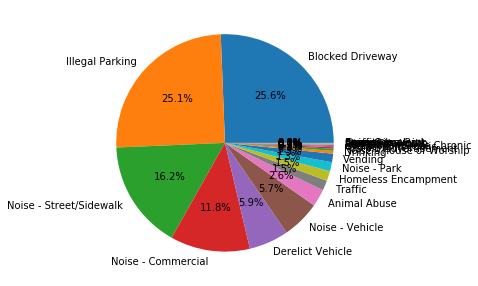

In [17]:
SortComplaintType = sortedComplaintType.head(6)
plt.figure(figsize=(5,5))
plt.pie(sortedComplaintType['Count'],labels=sortedComplaintType["Complaint Type"], autopct="%1.1f%%")
plt.show()

# Complaint types based on different location with average after  grouping them ‘Request_Closing_Time’

In [18]:
GroupComplaintType = NYC.groupby('Complaint Type')

In [19]:
GroupData = GroupComplaintType.get_group('Blocked Driveway')
GroupData.shape

(77044, 54)

In [20]:
#Check for missing values

NYC.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [21]:
#Drop Missing Values in City Column

NYC['City'].dropna(inplace=True)

In [22]:
#Shape after dropping missing values
NYC['City'].shape

(298084,)

In [23]:
#Count of Null values in grouped city column data
GroupData['City'].isnull().sum()

283

In [24]:
#Fix those Null with "unknown city" value instead
GroupData['City'].fillna('Unknown City', inplace =True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


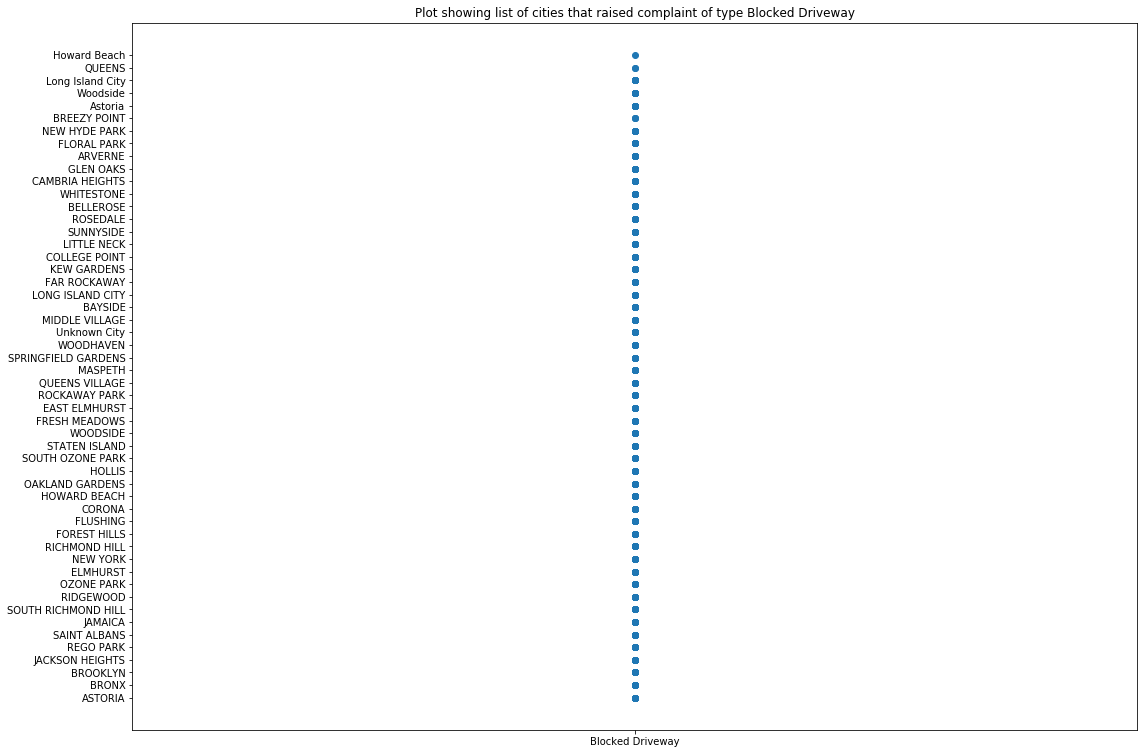

In [25]:
#Scatter plot displaying all the cities that raised complaint of type 'Blocked Driveway'

plt.figure(figsize=(18, 13))
plt.scatter(GroupData['Complaint Type'],GroupData['City'])
plt.title('Plot showing list of cities that raised complaint of type Blocked Driveway')
plt.show()